# **Unemployment Analysis using Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [4]:
un=pd.read_csv("/content/Unemployment in India.csv")

In [5]:
un

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Analysis**

In [6]:
un.shape

(768, 7)

In [7]:
un.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
un.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
un.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
un.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [12]:
un = un.rename(columns={un.columns[0]:'state', un.columns[3]:'EUR' , un.columns[4]:'EE',un.columns[5]:'ELPR',un.columns[6]:'region'})
un.head()

,state,Date,Frequency,EUR,EE,ELPR,region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
un["state"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [14]:
un["region"].unique()

array(['Rural', nan, 'Urban'], dtype=object)

# **Data Visualization**

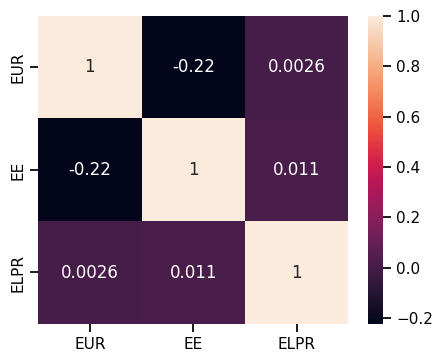

In [15]:
heat_maps=un[['EUR','EE','ELPR']]
heat_maps=heat_maps.corr()
plt.figure(figsize=(5,4))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='rocket');

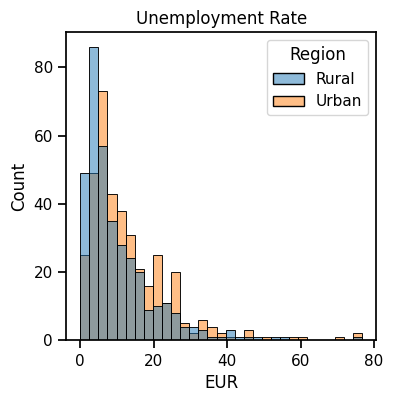

In [17]:
un.columns=["State" , "Date","Frequency", "EUR", "EE", "ELPR","Region"]
plt.figure(figsize=(4,4))
plt.title("Unemployment Rate")
sns.histplot(x="EUR",hue="Region",data=un)
plt.show()

In [19]:
unemployment=un.groupby(["Region","State"]).sum().reset_index()
fig=px.sunburst(unemployment,path=['Region','State'],values='EUR',title='Unemployment rate in every State and Region',height=650)
fig.show()

<ipython-input-19-b1668adde7f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unemployment=un.groupby(["Region","State"]).sum().reset_index()


In [20]:
round(un[['EUR', 'EE', 'ELPR']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
EUR,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
EE,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
ELPR,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [21]:
regionStats = un.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
round(regionStats,2)

,Region,EUR,EE,ELPR
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


<ipython-input-22-1a3fa170d381>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



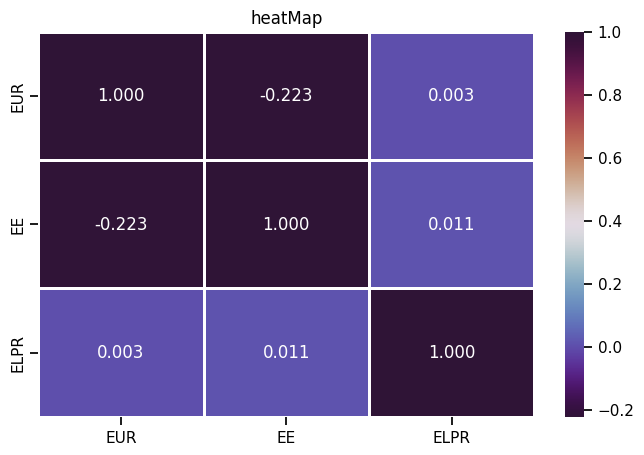

In [22]:
heatMap = un[['EUR','EE','ELPR', 'Date', 'Frequency']]
heatMap = heatMap.corr()
plt.figure(figsize=(8,5))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

In [23]:
fig = px.scatter_matrix(un,
    dimensions=['EUR','EE','ELPR'],
    color='Region')
fig.show()

In [24]:
fig = px.bar(un,
             x='Region',
             y='EUR',
             animation_frame = 'Frequency',
             color='State',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()